In [1]:
library(VineCopula)

In [2]:
dim <- 5
Matrix <- c(5, 2, 3, 1, 4,
            0, 2, 3, 4, 1,
            0, 0, 3, 4, 1,
            0, 0, 0, 4, 1,
            0, 0, 0, 0, 1)
Matrix <- matrix(Matrix, dim, dim)

# define R-vine pair-copula family matrix
family <- c(0, 1, 3, 4, 4,
            0, 0, 3, 4, 1,
            0, 0, 0, 4, 1,
            0, 0, 0, 0, 3,
            0, 0, 0, 0, 0)
family <- matrix(family, dim, dim)

# Params
par <- c(0, 0.2, 0.9, 1.5, 3.9,
         0, 0, 1.1, 1.6, 0.9,
         0, 0, 0, 1.9, 0.5,
         0, 0, 0, 0, 4.8,
         0, 0, 0, 0, 0)

par <- matrix(par, dim, dim)
# define second R-vine pair-copula parameter matrix
par2 <- matrix(0, dim, dim)

## define RVineMatrix object
RVM_0 <- VineCopula::RVineMatrix(Matrix = Matrix, family = family, par = par, par2 = par2)

In [29]:
par_new <- par
par_new[2, 1] = 0.9
par_new

0.0,0.0,0.0,0.0,0
0.9,0.0,0.0,0.0,0
0.9,1.1,0.0,0.0,0
1.5,1.6,1.9,0.0,0
3.9,0.9,0.5,4.8,0


In [30]:
RVM_new <- VineCopula::RVineMatrix(Matrix = Matrix, family = family, par = par_new, par2 = par2)

In [35]:
n <- 100000
data <- VineCopula::RVineSim(n, RVM_new)


In [36]:
res <- VineCopula::RVineLogLik(data, RVM_0, separate = TRUE, calculate.V = FALSE)


In [41]:
sum(res$loglik)

[1] 415052.3

In [37]:
mean(-res$loglik)

[1] -4.150523

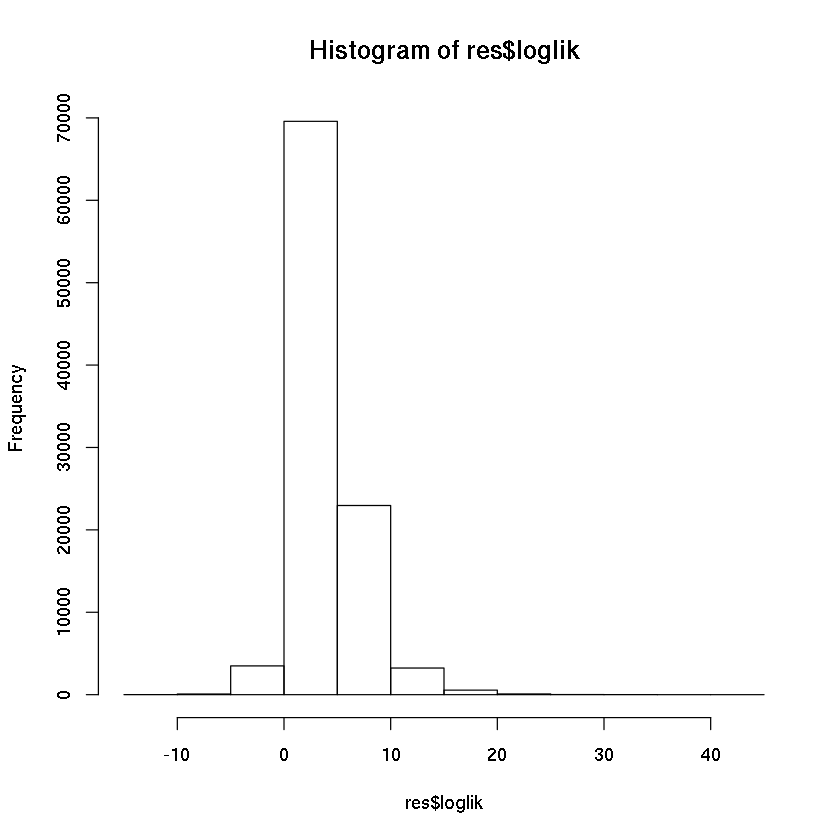

In [38]:
hist(res$loglik)

In [57]:
dim(res$V$direct)

[1]   5   5 100

In [24]:
?VineCopula::RVineLogLik